# Machine learning with Python - Homework 1

Росица Тодинова, ф.н. 71624, спец. ИС, 4 курс

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Зареждане на dataset-a, който ще използваме:

In [2]:
train = pd.read_csv('data/train.csv')

Нека видим какво съдържа този dataset:

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

След като сме заредили данните и сме видяли какво съдържа нашия dataset, ще проверим дали някои от тези данни не се повтарят, на база на колоната Id:

In [4]:
id_count = len(set(train.Id))
total = train.shape[0]
duplicates = total - id_count
print("Duplicates " + str(duplicates))

Duplicates 0


Както виждаме, няма повтaрящи се редове. Сега може да премахнем колоната Id, тъй като тя няма да ни е необходима.

In [5]:
train.drop('Id',axis=1,inplace = True)

Проверяваме за всяка колона, колко празни стойности има.

In [6]:
total = train.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total'])
missing_data.head(25)

,Total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageCond,81
GarageFinish,81
GarageQual,81


Нека да разгледаме следните колони: PoolQC - качество на басейн, MiscFeature - други особености, GarageType - локация на гараж, GarageCond - състояние на гаража. Нека предположим, че ако има празна стойност в някоя от тези колони, следователно няма налични: басейн, гараж, разни. За това ще заменим празните стойности с N/A. Ще дефинираме функция, която после да използваме върху тестовия сет. 

In [7]:
def fill_missing_data(dataset):
    dataset['PoolQC'].fillna('NA', inplace=True)
    dataset['MiscFeature'].fillna('NA', inplace=True)
    dataset['GarageType'].fillna('NA', inplace=True)
    dataset['GarageCond'].fillna('NA', inplace=True)

Ще премахнем останалите полета с повече от 1 празна стойност, тъй като заменянето им с други стойности не води до оптимизация (тествано).

In [8]:
def remove_missing_data_columns(dataset):
    dataset.drop('Alley',axis=1,inplace = True)
    dataset.drop('Fence',axis=1,inplace = True)
    dataset.drop('FireplaceQu',axis=1,inplace = True)
    dataset.drop('LotFrontage',axis=1,inplace = True)
    dataset.drop('GarageFinish',axis=1,inplace = True)
    dataset.drop('GarageQual',axis=1,inplace = True)
    dataset.drop('GarageYrBlt',axis=1,inplace = True)
    dataset = dataset.drop(train.loc[train['Electrical'].isnull()].index)
    return dataset

In [9]:
fill_missing_data(train)
train = remove_missing_data_columns(train)

Нека проверим дали 'SalePrice' следва нормалната дистрибуция:

/home/rositsa/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


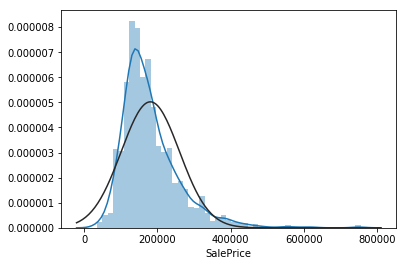

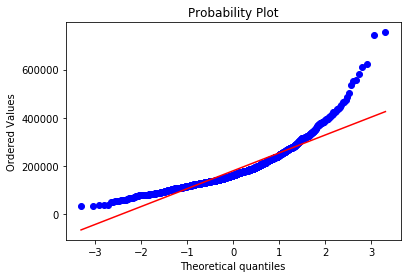

In [10]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [11]:
train['SalePrice'] = np.log(train['SalePrice'])

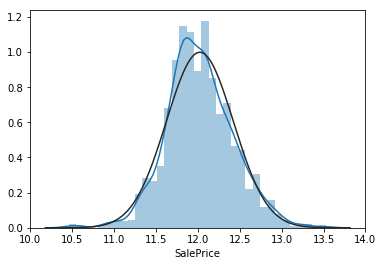

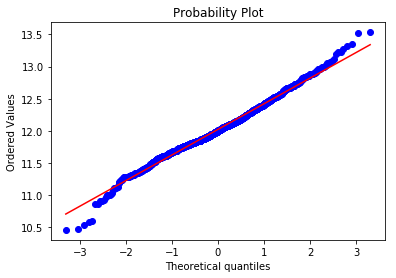

In [12]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

Така изглежда по-добре. Сега ще разгледаме колоните, които са най-силно вазимно свързани с колоната 'SalePrice'.

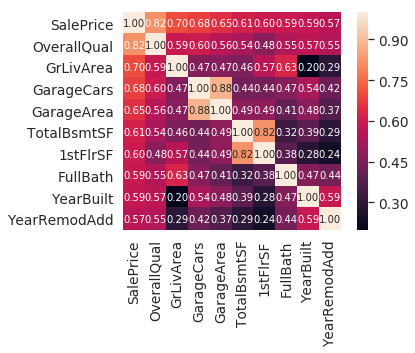

In [13]:
corrmat = train.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Както виждаме от този 'heatmap', две от най-зависимите колони с колоната 'SalePrice' са OverallQual и GrLivArea. Сега ще видим линейната връзка между GrLivAreа и SalePrice, и OverallQual и SalePrice, за да проверим за outlier-и.

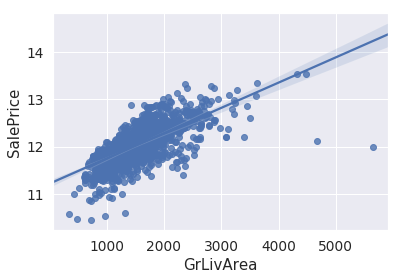

In [14]:
fig, ax = plt.subplots()
sns.regplot(train['GrLivArea'], train['SalePrice'])
plt.show()

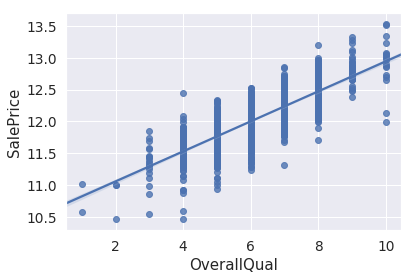

In [15]:
fig, ax = plt.subplots()
sns.regplot(train['OverallQual'], train['SalePrice'])
plt.show()

На първия плот ясно се виждат два outlier-а в дясно от правата. На втория също се виждат два. Единият е при OverallCond За това ще ги премахнем. 

In [16]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<=13)].index)
train = train.drop(train[(train['OverallQual']>9) & (train['SalePrice']<12.5)].index)

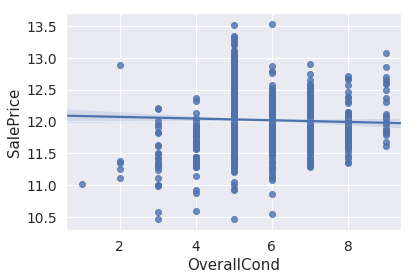

In [17]:
fig, ax = plt.subplots()
sns.regplot(train['OverallCond'], train['SalePrice'])
plt.show()

In [18]:
train = train.drop(train[(train['OverallCond']<3) & (train['SalePrice']>12.5)].index)
train = train.drop(train[(train['OverallCond']>=5) & (train['SalePrice']<10.5)].index)

Разделяне на dataset-a на dataset за обучение и dataset за тестване на модела:

In [19]:
train_no_sale_price = train.drop(labels=['SalePrice'], axis=1)
train_sale_price = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3,
                                                    random_state=4330)

Взимаме всички numerical и categorical колони:

In [20]:
numerical_columns = x_train.describe().columns
categorical_columns = train.dtypes[train.dtypes == 'object'].index

Заместваме празните стойности с 0:

In [21]:
x_train[numerical_columns] = x_train[numerical_columns].fillna(0)
x_test[numerical_columns] = x_test[numerical_columns].fillna(0)

/home/rositsa/.local/lib/python3.5/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Сега ще използваме линейна регресия, за да обучим модела и ще проверим score, за да видим колко добре се държи той:

In [22]:
regressor = LinearRegression()
regressor.fit(x_train[numerical_columns], y_train)
regressor.score(x_train[numerical_columns], y_train)

0.8963122740514897

Оценка с тестовите данни:

In [23]:
regressor.score(x_test[numerical_columns], y_test)

0.9162469046732744

Сега ще видим поведението на модела, когато използваме само categorical данни. За целта ще използваме LabelEncoder и OneHotEncoder.

In [24]:
train = train.fillna("")
encoders = {col: LabelEncoder().fit(train[col]) for col in categorical_columns}

In [25]:
def encode_categorical(data, columns, encoders):
    data = data.fillna("")
    return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
                        index = data.index)

train_encoded = encode_categorical(train, categorical_columns, encoders)
one_hot_encoder = OneHotEncoder().fit(train_encoded)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [26]:
one_hot_x_train = one_hot_encoder.transform(encode_categorical(x_train[categorical_columns], categorical_columns, encoders))
cat_regression = LinearRegression().fit(one_hot_x_train, y_train)
print(cat_regression.score(one_hot_x_train, y_train))

one_hot_x_test = one_hot_encoder.transform(encode_categorical(x_test[categorical_columns], categorical_columns, encoders))
print(cat_regression.score(one_hot_x_test, y_test))

0.8640164449128778
0.7928759834437774


Обединяваме Categorical и Numerical данните:

In [27]:
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numerical_columns]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numerical_columns]], axis=1)

In [28]:
for a in np.arange(0.1, 100, 0.5):
    all_data_lr = Ridge(alpha = a).fit(new_x_train, y_train)
    print('alpha:', a)
    print(all_data_lr.score(new_x_train, y_train), all_data_lr.score(new_x_test, y_test))

alpha: 14.1
0.9366897417521465 0.9325958622661394
alpha: 14.6
0.9364897611729152 0.9326216327044115
alpha: 15.1
0.9362946701298664 0.9326442897165155
alpha: 15.6
0.9361042103588264 0.9326640772911998
alpha: 16.1
0.9359181436228649 0.9326812138722826
alpha: 16.6
0.9357362496974623 0.9326958957381025
alpha: 17.1
0.9355583246022992 0.9327082998455728
alpha: 17.6
0.9353841790444372 0.9327185862367073
alpha: 18.1
0.9352136370433521 0.9327269000853561
alpha: 18.6
0.9350465347129778 0.9327333734463575
alpha: 19.1
0.9348827191797648 0.9327381267571893
alpha: 19.6
0.9347220476189584 0.9327412701327045
alpha: 20.1
0.9345643863939461 0.9327429044860155
alpha: 20.6
0.9344096102857385 0.9327431225026347


Най-добрият резултат, който получаваме е при:
alpha: 20.6
0.9344096102857385 0.9327431225026347